### 1. Prior Knowledge
	When k or h is small, single instances matter; bias is small, variance is large (undersmoothing): High complexity<br>
	As k or h increases, we average over more instances and variance decreases but bias increases (oversmoothing): Low complexity<br>
	Cross-validation is used to finetune k or h<br>


### 2. Explore Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import datetime
from sklearn import metrics
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df_training_15 = pd.read_csv("training_15.csv",header=None)
df_training_20 = pd.read_csv("training_20.csv",header=None)
df_training_25 = pd.read_csv("training_25.csv",header=None)

df_test_15 = pd.read_csv("test_15.csv",header=None)
df_test_20 = pd.read_csv("test_20.csv",header=None)
df_test_25 = pd.read_csv("test_25.csv",header=None)

df_training_15.head()

,0,1,2,3
0,0.083573,-0.112920,1.046700,2
1,0.944030,0.245360,0.363500,5
2,-0.141750,1.010700,-0.072637,3
3,-0.072509,0.001243,0.914220,2
4,-0.088260,1.042600,1.307500,4


In [4]:
# Check if the labels are categoric or continues.
print(df_training_15[3].unique())
print(df_training_20[3].unique())
print(df_training_25[3].unique())

[2 5 3 4 1 6 7 8]
[5 2 6 4 3 1 8 7]
[6 5 2 8 3 1 7 4]


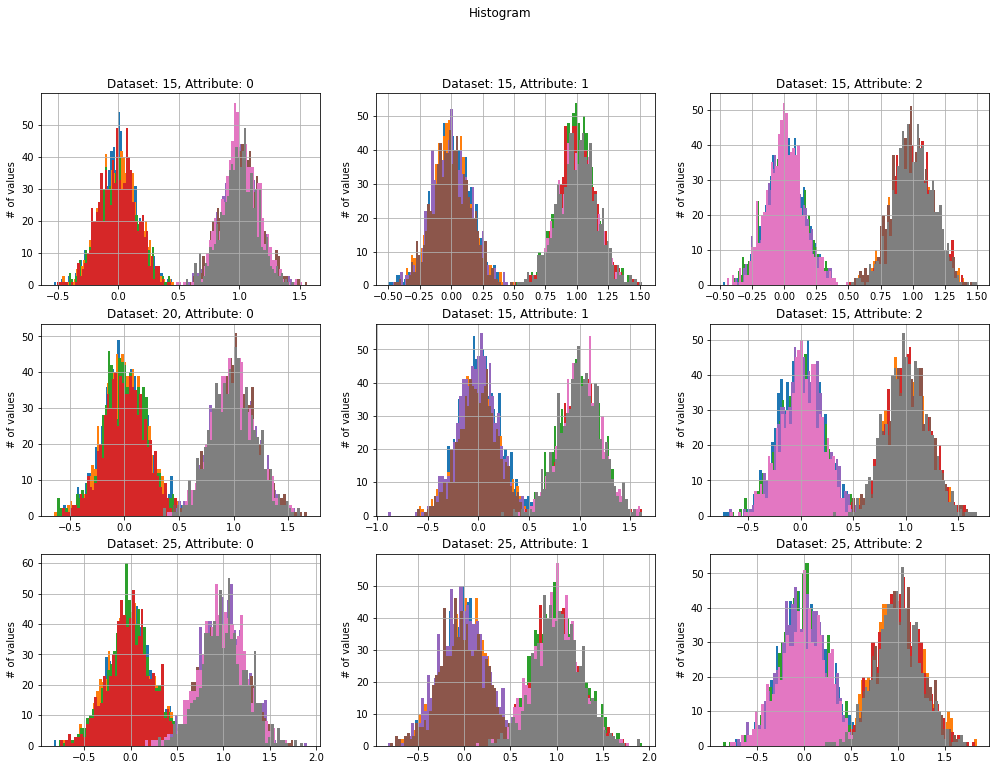

In [5]:
bins= 50
    
# plot to see clearly
plt.figure(figsize=(17,12))

plt.subplot(3, 3, 1)
plt.suptitle('Histogram')
plt.title('Dataset: 15, Attribute: 0')
#plt.xlabel('Values')
plt.ylabel('# of values')
df_training_15[df_training_15[3]==1][0].hist(bins=bins)
df_training_15[df_training_15[3]==2][0].hist(bins=bins)
df_training_15[df_training_15[3]==3][0].hist(bins=bins)
df_training_15[df_training_15[3]==4][0].hist(bins=bins)
df_training_15[df_training_15[3]==5][0].hist(bins=bins)
df_training_15[df_training_15[3]==6][0].hist(bins=bins)
df_training_15[df_training_15[3]==7][0].hist(bins=bins)
df_training_15[df_training_15[3]==8][0].hist(bins=bins)

plt.subplot(3, 3, 2)
plt.title('Dataset: 15, Attribute: 1')
#plt.xlabel('Values')
plt.ylabel('# of values')
df_training_15[df_training_15[3]==1][1].hist(bins=bins)
df_training_15[df_training_15[3]==2][1].hist(bins=bins)
df_training_15[df_training_15[3]==3][1].hist(bins=bins)
df_training_15[df_training_15[3]==4][1].hist(bins=bins)
df_training_15[df_training_15[3]==5][1].hist(bins=bins)
df_training_15[df_training_15[3]==6][1].hist(bins=bins)
df_training_15[df_training_15[3]==7][1].hist(bins=bins)
df_training_15[df_training_15[3]==8][1].hist(bins=bins)

plt.subplot(3, 3, 3)
plt.title('Dataset: 15, Attribute: 2')
#plt.xlabel('Values')
plt.ylabel('# of values')
df_training_15[df_training_15[3]==1][2].hist(bins=bins)
df_training_15[df_training_15[3]==2][2].hist(bins=bins)
df_training_15[df_training_15[3]==3][2].hist(bins=bins)
df_training_15[df_training_15[3]==4][2].hist(bins=bins)
df_training_15[df_training_15[3]==5][2].hist(bins=bins)
df_training_15[df_training_15[3]==6][2].hist(bins=bins)
df_training_15[df_training_15[3]==7][2].hist(bins=bins)
df_training_15[df_training_15[3]==8][2].hist(bins=bins)

plt.subplot(3, 3, 4)
plt.title('Dataset: 20, Attribute: 0')
#plt.xlabel('Values')
plt.ylabel('# of values')
df_training_20[df_training_20[3]==1][0].hist(bins=bins)
df_training_20[df_training_20[3]==2][0].hist(bins=bins)
df_training_20[df_training_20[3]==3][0].hist(bins=bins)
df_training_20[df_training_20[3]==4][0].hist(bins=bins)
df_training_20[df_training_20[3]==5][0].hist(bins=bins)
df_training_20[df_training_20[3]==6][0].hist(bins=bins)
df_training_20[df_training_20[3]==7][0].hist(bins=bins)
df_training_20[df_training_20[3]==8][0].hist(bins=bins)

plt.subplot(3, 3, 5)
plt.title('Dataset: 15, Attribute: 1')
#plt.xlabel('Values')
plt.ylabel('# of values')
df_training_20[df_training_20[3]==1][1].hist(bins=bins)
df_training_20[df_training_20[3]==2][1].hist(bins=bins)
df_training_20[df_training_20[3]==3][1].hist(bins=bins)
df_training_20[df_training_20[3]==4][1].hist(bins=bins)
df_training_20[df_training_20[3]==5][1].hist(bins=bins)
df_training_20[df_training_20[3]==6][1].hist(bins=bins)
df_training_20[df_training_20[3]==7][1].hist(bins=bins)
df_training_20[df_training_20[3]==8][1].hist(bins=bins)

plt.subplot(3, 3, 6)
plt.title('Dataset: 15, Attribute: 2')
#plt.xlabel('Values')
plt.ylabel('# of values')
df_training_20[df_training_20[3]==1][2].hist(bins=bins)
df_training_20[df_training_20[3]==2][2].hist(bins=bins)
df_training_20[df_training_20[3]==3][2].hist(bins=bins)
df_training_20[df_training_20[3]==4][2].hist(bins=bins)
df_training_20[df_training_20[3]==5][2].hist(bins=bins)
df_training_20[df_training_20[3]==6][2].hist(bins=bins)
df_training_20[df_training_20[3]==7][2].hist(bins=bins)
df_training_20[df_training_20[3]==8][2].hist(bins=bins)

plt.subplot(3, 3, 7)
plt.title('Dataset: 25, Attribute: 0')
#plt.xlabel('Values')
plt.ylabel('# of values')
df_training_25[df_training_25[3]==1][0].hist(bins=bins)
df_training_25[df_training_25[3]==2][0].hist(bins=bins)
df_training_25[df_training_25[3]==3][0].hist(bins=bins)
df_training_25[df_training_25[3]==4][0].hist(bins=bins)
df_training_25[df_training_25[3]==5][0].hist(bins=bins)
df_training_25[df_training_25[3]==6][0].hist(bins=bins)
df_training_25[df_training_25[3]==7][0].hist(bins=bins)
df_training_25[df_training_25[3]==8][0].hist(bins=bins)

plt.subplot(3, 3, 8)
plt.title('Dataset: 25, Attribute: 1')
#plt.xlabel('Values')
plt.ylabel('# of values')
df_training_25[df_training_25[3]==1][1].hist(bins=bins)
df_training_25[df_training_25[3]==2][1].hist(bins=bins)
df_training_25[df_training_25[3]==3][1].hist(bins=bins)
df_training_25[df_training_25[3]==4][1].hist(bins=bins)
df_training_25[df_training_25[3]==5][1].hist(bins=bins)
df_training_25[df_training_25[3]==6][1].hist(bins=bins)
df_training_25[df_training_25[3]==7][1].hist(bins=bins)
df_training_25[df_training_25[3]==8][1].hist(bins=bins)

plt.subplot(3, 3, 9)
plt.title('Dataset: 25, Attribute: 2')
#plt.xlabel('Values')
plt.ylabel('# of values')
df_training_25[df_training_25[3]==1][2].hist(bins=bins)
df_training_25[df_training_25[3]==2][2].hist(bins=bins)
df_training_25[df_training_25[3]==3][2].hist(bins=bins)
df_training_25[df_training_25[3]==4][2].hist(bins=bins)
df_training_25[df_training_25[3]==5][2].hist(bins=bins)
df_training_25[df_training_25[3]==6][2].hist(bins=bins)
df_training_25[df_training_25[3]==7][2].hist(bins=bins)
df_training_25[df_training_25[3]==8][2].hist(bins=bins)
plt.show()

2) the accuracy of results (to what extent your labels coincide with the true labels) will compose most of your grade. The test sets' weight on the grade will differ based on the amount of the noise involved. The higher the weight of a test set the higher its percent of noise.

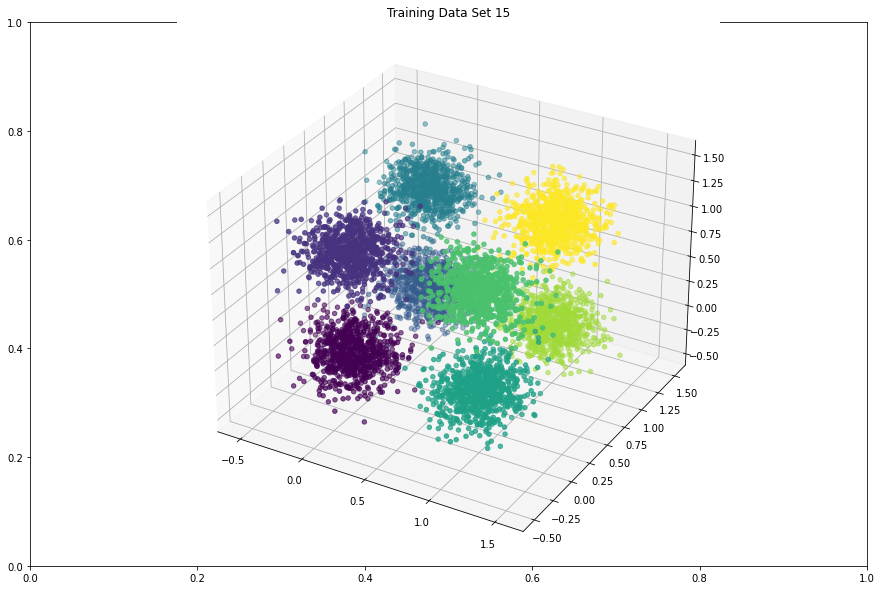

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
plt.title('Training Data Set 15')
ax = fig.add_subplot(111, projection='3d' , alpha = 0.5)
ax.scatter(df_training_15.values[:,0], df_training_15.values[:,1], df_training_15.values[:,2], c = df_training_15.values[:,3])

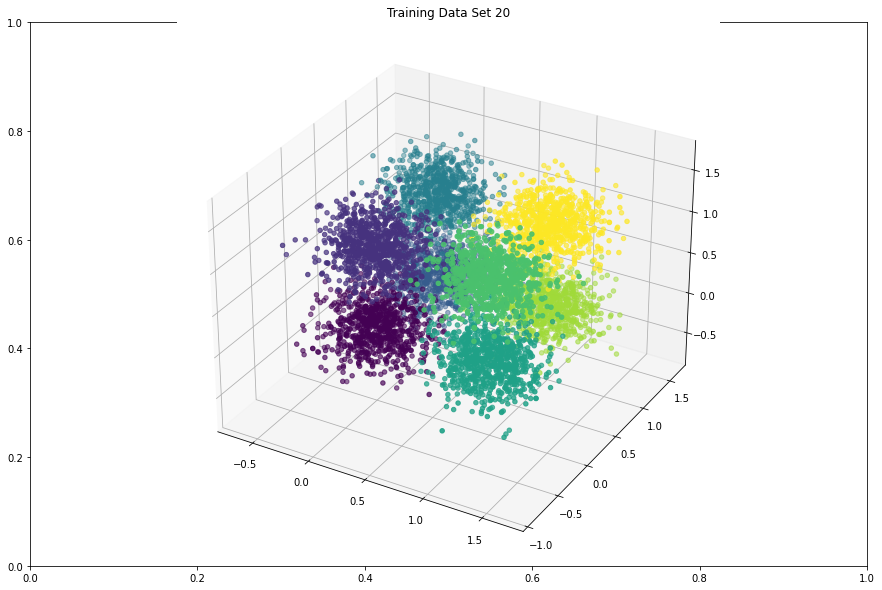

In [7]:
fig = plt.figure(figsize=(15,10))
plt.title('Training Data Set 20')
ax = fig.add_subplot(111, projection='3d' , alpha = 0.5)
ax.scatter(df_training_20.values[:,0], df_training_20.values[:,1], df_training_20.values[:,2], c = df_training_20.values[:,3])

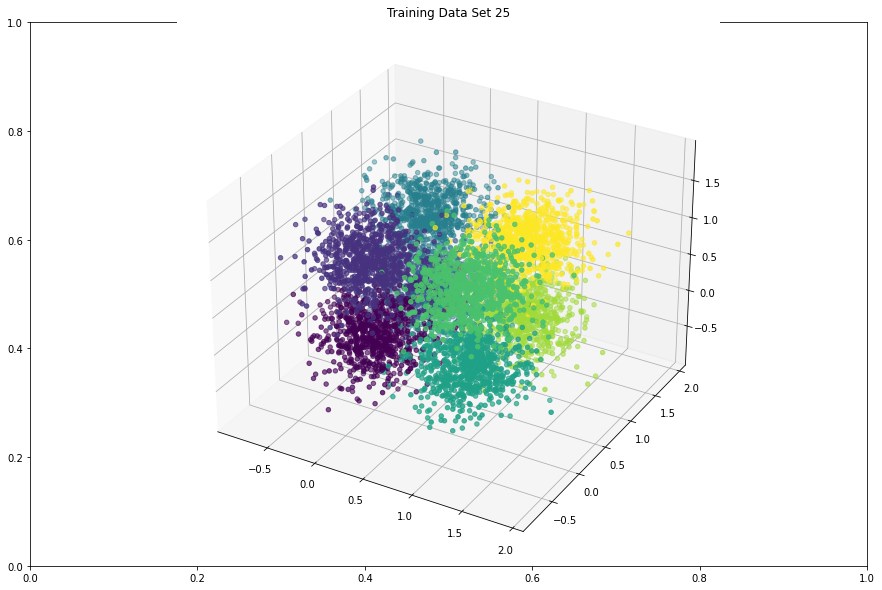

In [8]:
fig = plt.figure(figsize=(15,10))
plt.title('Training Data Set 25')
ax = fig.add_subplot(111, projection='3d' , alpha = 0.5)
ax.scatter(df_training_25.values[:,0], df_training_25.values[:,1], df_training_25.values[:,2], c = df_training_25.values[:,3])

### 3. Determination of K

Start time:  2021-12-25 20:24:55.207373
Number of neigbours k:  100
Number of neigbours k:  200
Number of neigbours k:  300
Number of neigbours k:  400
Maximum accuracy Dataset15: 0.99921875 at K = 9
Maximum accuracy Dataset20: 0.98359375 at K = 29
Maximum accuracy Dataset25: 0.9412499999999999 at K = 249
End time:  2021-12-25 20:47:10.703536


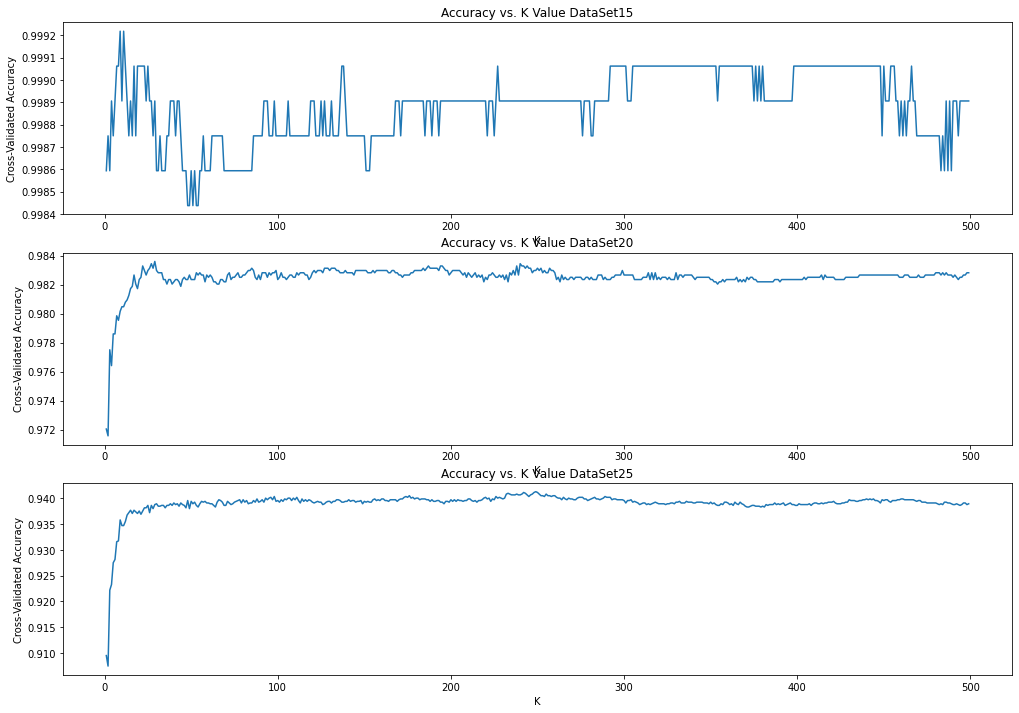

In [35]:
# import k-folder
from sklearn.model_selection  import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# choose k between 1 to 10
k_range = range(1, 500)
k_scores_15 = []
k_scores_20 = []
k_scores_25 = []
features_tr_15 = df_training_15[[0,1,2]].values
features_tr_20 = df_training_20[[0,1,2]].values
features_tr_25 = df_training_25[[0,1,2]].values
label_tr_15 = df_training_15[[3]].values[:,0]
label_tr_20 = df_training_20[[3]].values[:,0]
label_tr_25 = df_training_25[[3]].values[:,0]

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
print("Start time: ",datetime.datetime.now())
for k in k_range:
    knn_15 = KNeighborsClassifier(n_neighbors=k,p=3)
    scores = cross_val_score(knn_15, features_tr_15, label_tr_15, cv=5, scoring='accuracy')
    k_scores_15.append(scores.mean())

    knn_20 = KNeighborsClassifier(n_neighbors=k,p=3)
    scores = cross_val_score(knn_20, features_tr_20, label_tr_20, cv=5, scoring='accuracy')
    k_scores_20.append(scores.mean())

    knn_25 = KNeighborsClassifier(n_neighbors=k,p=3)
    scores = cross_val_score(knn_25, features_tr_25, label_tr_25, cv=5, scoring='accuracy')
    k_scores_25.append(scores.mean())
    if k%100==0:
        print("Number of neigbours k: ",str(k))
# plot to see clearly
plt.figure(figsize=(17,12))


plt.subplot(3, 1, 1)
plt.plot(k_range, k_scores_15)
plt.title('Accuracy vs. K Value DataSet15')
plt.xlabel('K')
plt.ylabel('Cross-Validated Accuracy')

plt.subplot(3, 1, 2)
plt.plot(k_range, k_scores_20)
plt.title('Accuracy vs. K Value DataSet20')
plt.xlabel('K')
plt.ylabel('Cross-Validated Accuracy')

plt.subplot(3, 1, 3)
plt.plot(k_range, k_scores_25)
plt.title('Accuracy vs. K Value DataSet25')
plt.xlabel('K')
plt.ylabel('Cross-Validated Accuracy')

print("Maximum accuracy Dataset15:",max(k_scores_15),"at K =",k_scores_15.index(max(k_scores_15))+1)
print("Maximum accuracy Dataset20:",max(k_scores_20),"at K =",k_scores_20.index(max(k_scores_20))+1)
print("Maximum accuracy Dataset25:",max(k_scores_25),"at K =",k_scores_25.index(max(k_scores_25))+1)

print("End time: ",datetime.datetime.now())

In [ ]:
p = 1:

Maximum accuracy Dataset15: 0.9990625 at K = 4
Maximum accuracy Dataset20: 0.9832812500000001 at K = 103
Maximum accuracy Dataset25: 0.9409375000000001 at K = 350
    
p = 2:

Maximum accuracy Dataset15: 0.999375 at K = 9
Maximum accuracy Dataset20: 0.98359375 at K = 125
Maximum accuracy Dataset25: 0.940625 at K = 270

p = 3:

Maximum accuracy Dataset15: 0.99921875 at K = 9
Maximum accuracy Dataset20: 0.98359375 at K = 29
Maximum accuracy Dataset25: 0.9412499999999999 at K = 249

p = 4:
    
Maximum accuracy Dataset15: 0.99921875 at K = 9
Maximum accuracy Dataset20: 0.9834375 at K = 239
Maximum accuracy Dataset25: 0.940625 at K = 226      

p  = 10:

Maximum accuracy Dataset15: 0.99921875 at K = 9
Maximum accuracy Dataset20: 0.98359375 at K = 253
Maximum accuracy Dataset25: 0.9409375000000001 at K = 136

p  = 100:

Maximum accuracy Dataset15: 0.9990625 at K = 3
Maximum accuracy Dataset20: 0.9837499999999999 at K = 255
Maximum accuracy Dataset25: 0.94046875 at K = 141
    



### 4. Result<br>

The result of Cross Validation on training sets show that low noise data set(ds15) performs better with lower k, while high noise data set(ds25) performs better with higher k. This result validates the previous estimation. High noise data has the best performance with a simpler model(high k value) and vise-versa. Based on these k values, the labels of given test sets are predicted. 

In [63]:
knn_15 = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 3)
knn_15.fit(features_tr_15, label_tr_15)
pred_15 = knn_15.predict(df_test_15)
test_15 = df_test_15.to_numpy()
test15_labeled = np.c_[test_15,pred_15]
np.savetxt("test15_labeled.csv", np.around(test15_labeled,decimals=6), delimiter=",",fmt='%1.6f')

knn_20 = KNeighborsClassifier(n_neighbors = 29, metric = 'minkowski', p = 3)
knn_20.fit(features_tr_20, label_tr_20)
pred_20 = knn_20.predict(df_test_20)
test_20 = df_test_20.to_numpy()
test20_labeled = np.c_[test_20,pred_20]
np.savetxt("test20_labeled.csv", np.around(test20_labeled,decimals=6), delimiter=",",fmt='%1.6f')

knn_25 = KNeighborsClassifier(n_neighbors = 249, metric = 'minkowski', p = 3)
knn_25.fit(features_tr_25, label_tr_25)
pred_25 = knn_25.predict(df_test_25)
test_25 = df_test_25.to_numpy()
test25_labeled = np.c_[test_25,pred_25]
np.savetxt("test25_labeled.csv", np.around(test25_labeled,decimals=6), delimiter=",",fmt='%1.6f')